In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

2024-08-23 10:23:16.802152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 10:23:18.347579: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 10:23:18.793704: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-23 10:23:18.793759: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# Load the saved model
loaded_model = tf.keras.models.load_model('best_model.h5')

2024-08-23 10:23:31.374287: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-23 10:23:31.375563: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-23 10:23:31.375611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HPG-01): /proc/driver/nvidia/version does not exist
2024-08-23 10:23:31.401550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load your dataset
df = pd.read_csv('main_use_data.csv')

# Shuffle the DataFrame
data = df.sample(frac=1, random_state=58)

data = data[0:2000]

In [4]:
df.head()

,Unnamed: 0,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0,W13,W23,Tmax
0,0,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.0865,55,133,259.3814,2.0496,2.125505e+14,1.088519e+14,0.1773
1,1,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1038,55,133,259.3814,2.0493,2.125505e+14,1.088519e+14,0.2128
2,2,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1211,55,133,259.3814,2.0481,2.125505e+14,1.088519e+14,0.2482
3,3,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1385,55,133,259.3814,2.0451,2.125505e+14,1.088519e+14,0.2839
4,4,6,2,1.5,7,2,1.5,8,3,2.5,0.0083,0.1558,55,133,259.3814,2.0394,2.125505e+14,1.088519e+14,0.3193


In [5]:
# Define input features and target variables
input_features = ['n1', 'l1', 'j1', 'LP', 'Te', 'Z', 'A', 'Rfq', 'T0' ]
target_variables = ['n2', 'l2', 'j2', 'n3', 'l3', 'j3']

In [6]:
# Split the dataset into input (X) and target (y) variables
X = data[input_features]
y = data[target_variables]

In [7]:
# Use the loaded model to make predictions
scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X)
X_new_data = X  # Provide new data for prediction, shape should match the input shape during training
X_new_data_scaled = scaler.transform(X_new_data)  # Scale the new data using the same scaler used during training
predictions = loaded_model.predict(X_new_data_scaled)


63/63 [==============================] - 1s 2ms/step


In [8]:
# Create a DataFrame to store input data and predictions
result_df = pd.DataFrame(data=X_new_data, columns=input_features)
result_df[target_variables] = predictions

In [9]:
result_df

,n1,l1,j1,LP,Te,Z,A,Rfq,T0,n2,l2,j2,n3,l3,j3
4105019,10,7,7.5,0.8347,0.5711,37,87,25100.5887,2.3451,11.073594,5.224536,6.084145,13.261250,5.762622,6.533318
3620099,5,3,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,6.093653,1.887780,2.129126,9.815884,2.824338,3.028477
3990713,5,3,2.5,0.6694,0.1038,37,87,1867.7882,5.3274,7.487044,1.133227,1.533530,11.009427,1.919264,2.333696
3196189,8,3,3.5,0.8347,0.1558,11,23,12365.4696,2.1335,9.151669,2.554674,3.034117,13.493644,1.845209,2.393948
2466583,5,3,2.5,0.5041,0.3808,3,7,611.1849,2.0729,5.777991,2.965652,2.767977,11.084984,2.057709,2.566948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,9,7,6.5,0.5041,0.6923,55,133,180.9488,2.2635,10.111737,6.688669,6.281297,15.184874,5.696169,6.026045
2494258,7,6,5.5,0.5041,0.9519,3,7,3385.3604,3.1959,7.973505,4.034019,3.736608,13.829115,5.008633,4.661531
2375672,10,7,6.5,0.1736,0.1558,3,7,549.2264,2.0060,11.125002,6.921421,6.581666,13.634798,6.002024,6.378891
1750502,5,3,3.5,0.0083,0.7442,3,6,258.1032,2.0441,5.966799,3.118216,3.762925,15.457940,2.471114,2.623022


In [10]:
data

,Unnamed: 0,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0,W13,W23,Tmax
4105019,4105019,10,7,7.5,11,5,5.5,13,6,6.5,0.8347,0.5711,37,87,25100.5887,2.3451,1.343184e+13,7.727172e+12,1.3447
3620099,3620099,5,3,3.5,6,3,2.5,10,4,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,9.937614e+13,5.889786e+13,0.8072
3990713,3990713,5,3,2.5,8,1,0.5,14,2,1.5,0.6694,0.1038,37,87,1867.7882,5.3274,1.117589e+14,9.504699e+13,0.6942
3196189,3196189,8,3,3.5,9,3,3.5,14,2,2.5,0.8347,0.1558,11,23,12365.4696,2.1335,3.460176e+13,2.380762e+13,0.4994
2466583,2466583,5,3,2.5,6,3,2.5,10,2,2.5,0.5041,0.3808,3,7,611.1849,2.0729,9.868895e+13,5.847618e+13,0.9345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,187743,9,7,6.5,10,7,6.5,14,6,6.5,0.5041,0.6923,55,133,180.9488,2.2635,2.383197e+13,1.611404e+13,2.1377
2494258,2494258,7,6,5.5,8,4,3.5,14,5,4.5,0.5041,0.9519,3,7,3385.3604,3.1959,5.035079e+13,3.461617e+13,3.0461
2375672,2375672,10,7,6.5,11,7,6.5,13,6,6.5,0.1736,0.1558,3,7,549.2264,2.0060,1.343085e+13,7.721652e+12,0.3665
1750502,1750502,5,3,3.5,6,3,3.5,13,2,2.5,0.0083,0.7442,3,6,258.1032,2.0441,1.121253e+14,7.191310e+13,2.0751


In [11]:
result_df['j3'] = (result_df['j3']*2).round()/2


In [12]:
result_df

,n1,l1,j1,LP,Te,Z,A,Rfq,T0,n2,l2,j2,n3,l3,j3
4105019,10,7,7.5,0.8347,0.5711,37,87,25100.5887,2.3451,11.073594,5.224536,6.084145,13.261250,5.762622,6.5
3620099,5,3,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,6.093653,1.887780,2.129126,9.815884,2.824338,3.0
3990713,5,3,2.5,0.6694,0.1038,37,87,1867.7882,5.3274,7.487044,1.133227,1.533530,11.009427,1.919264,2.5
3196189,8,3,3.5,0.8347,0.1558,11,23,12365.4696,2.1335,9.151669,2.554674,3.034117,13.493644,1.845209,2.5
2466583,5,3,2.5,0.5041,0.3808,3,7,611.1849,2.0729,5.777991,2.965652,2.767977,11.084984,2.057709,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,9,7,6.5,0.5041,0.6923,55,133,180.9488,2.2635,10.111737,6.688669,6.281297,15.184874,5.696169,6.0
2494258,7,6,5.5,0.5041,0.9519,3,7,3385.3604,3.1959,7.973505,4.034019,3.736608,13.829115,5.008633,4.5
2375672,10,7,6.5,0.1736,0.1558,3,7,549.2264,2.0060,11.125002,6.921421,6.581666,13.634798,6.002024,6.5
1750502,5,3,3.5,0.0083,0.7442,3,6,258.1032,2.0441,5.966799,3.118216,3.762925,15.457940,2.471114,2.5


In [13]:
result_df['j2'] = (result_df['j2']*2).round()/2

In [14]:
result_df['n2'] = (result_df['n2'].round())
result_df['n3'] = (result_df['n3'].round())
result_df['l2'] = (result_df['l2'].round())
result_df['l3'] = (result_df['l3'].round())


In [15]:
result_df

,n1,l1,j1,LP,Te,Z,A,Rfq,T0,n2,l2,j2,n3,l3,j3
4105019,10,7,7.5,0.8347,0.5711,37,87,25100.5887,2.3451,11.0,5.0,6.0,13.0,6.0,6.5
3620099,5,3,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,6.0,2.0,2.0,10.0,3.0,3.0
3990713,5,3,2.5,0.6694,0.1038,37,87,1867.7882,5.3274,7.0,1.0,1.5,11.0,2.0,2.5
3196189,8,3,3.5,0.8347,0.1558,11,23,12365.4696,2.1335,9.0,3.0,3.0,13.0,2.0,2.5
2466583,5,3,2.5,0.5041,0.3808,3,7,611.1849,2.0729,6.0,3.0,3.0,11.0,2.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,9,7,6.5,0.5041,0.6923,55,133,180.9488,2.2635,10.0,7.0,6.5,15.0,6.0,6.0
2494258,7,6,5.5,0.5041,0.9519,3,7,3385.3604,3.1959,8.0,4.0,3.5,14.0,5.0,4.5
2375672,10,7,6.5,0.1736,0.1558,3,7,549.2264,2.0060,11.0,7.0,6.5,14.0,6.0,6.5
1750502,5,3,3.5,0.0083,0.7442,3,6,258.1032,2.0441,6.0,3.0,4.0,15.0,2.0,2.5


In [16]:
data

,Unnamed: 0,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0,W13,W23,Tmax
4105019,4105019,10,7,7.5,11,5,5.5,13,6,6.5,0.8347,0.5711,37,87,25100.5887,2.3451,1.343184e+13,7.727172e+12,1.3447
3620099,3620099,5,3,3.5,6,3,2.5,10,4,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,9.937614e+13,5.889786e+13,0.8072
3990713,3990713,5,3,2.5,8,1,0.5,14,2,1.5,0.6694,0.1038,37,87,1867.7882,5.3274,1.117589e+14,9.504699e+13,0.6942
3196189,3196189,8,3,3.5,9,3,3.5,14,2,2.5,0.8347,0.1558,11,23,12365.4696,2.1335,3.460176e+13,2.380762e+13,0.4994
2466583,2466583,5,3,2.5,6,3,2.5,10,2,2.5,0.5041,0.3808,3,7,611.1849,2.0729,9.868895e+13,5.847618e+13,0.9345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,187743,9,7,6.5,10,7,6.5,14,6,6.5,0.5041,0.6923,55,133,180.9488,2.2635,2.383197e+13,1.611404e+13,2.1377
2494258,2494258,7,6,5.5,8,4,3.5,14,5,4.5,0.5041,0.9519,3,7,3385.3604,3.1959,5.035079e+13,3.461617e+13,3.0461
2375672,2375672,10,7,6.5,11,7,6.5,13,6,6.5,0.1736,0.1558,3,7,549.2264,2.0060,1.343085e+13,7.721652e+12,0.3665
1750502,1750502,5,3,3.5,6,3,3.5,13,2,2.5,0.0083,0.7442,3,6,258.1032,2.0441,1.121253e+14,7.191310e+13,2.0751


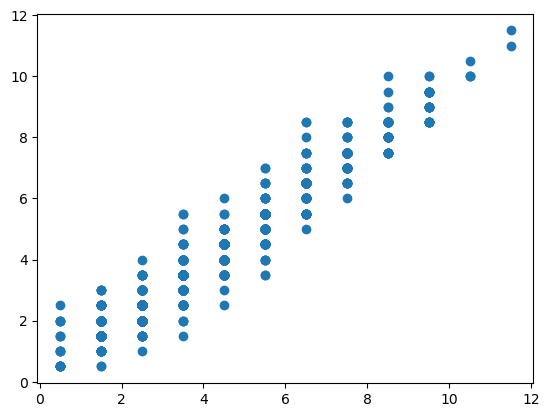

In [17]:

plt.scatter(data.j3.values,result_df.j3.values)


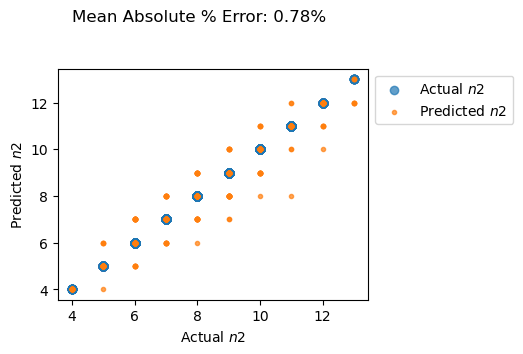

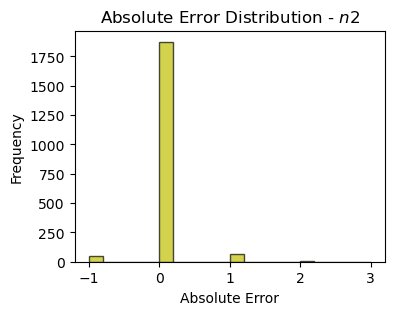

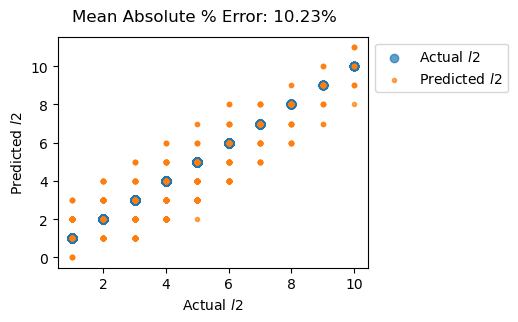

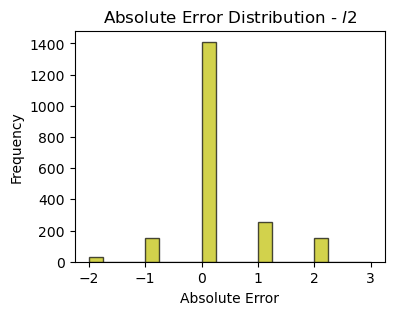

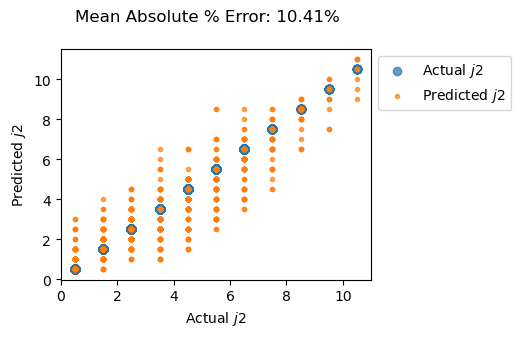

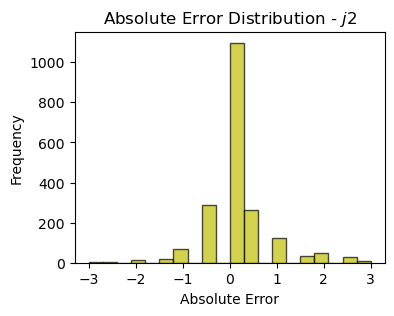

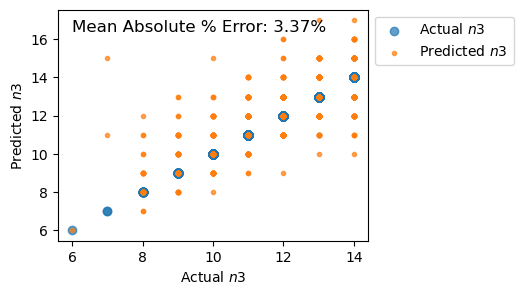

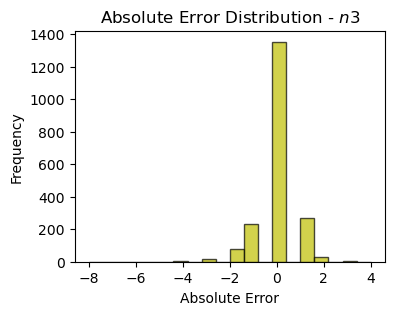

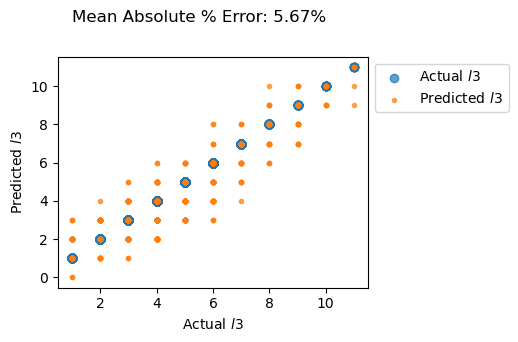

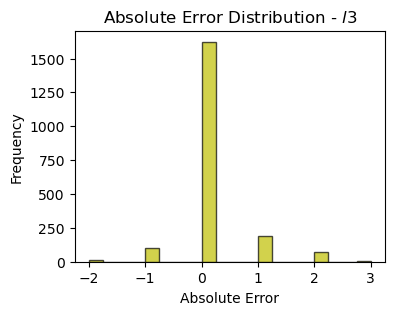

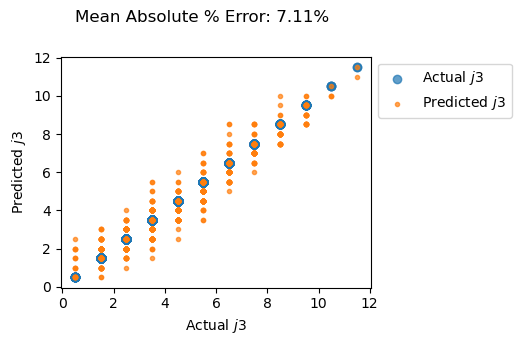

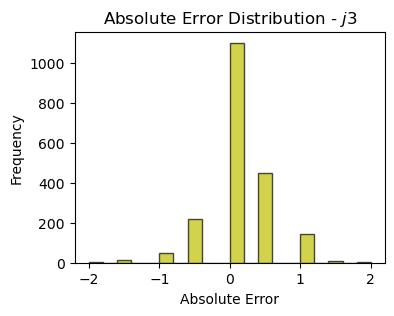

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to plot scatter and histogram
def plot_scatter_and_histogram(x_values, y_values_actual, y_values_predicted, label):
    # Calculate absolute error
    error = y_values_actual - y_values_predicted
    absolute_error = np.abs(y_values_actual - y_values_predicted)
    mean_error = np.mean(absolute_error)
    true_val_mean = np.mean(y_values_actual)
    mape =(mean_error/true_val_mean)*100
#     mapd = (absolute_error/y_values_actual)/y_values_actual.shape
    
    # Scatter plot with different markers for actual and predicted values
    plt.figure(figsize=(4,3))
    plt.scatter(x_values, y_values_actual, label=f'Actual {label}', alpha=0.7, marker='o')
    plt.scatter(x_values, y_values_predicted, label=f'Predicted {label}', alpha=0.7, marker='.')

    # Display mean absolute error
#     plt.text(np.min(x_values), np.max(y_values_actual), f'Mean Absolute Error: {np.mean(absolute_error):.2f}', ha='left', va='top', color='k', fontsize=12)
    plt.text(np.min(x_values), np.max(y_values_actual)+3, f'Mean Absolute % Error: {mape:.2f}%', ha='left', va='top', color='k', fontsize=12)
#     plt.text(np.min(x_values)+6, np.max(y_values_actual)+6, f'Mean Absolute % Error: {mapd:.2f}', ha='left', va='top', color='k', fontsize=12)
    # Add labels and legend
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Create histogram for absolute error
    plt.figure(figsize=(4,3))
    plt.hist(error, bins=20, color='y', alpha=0.7, edgecolor='black')
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title(f'Absolute Error Distribution - {label}')

    # Show the plots
    plt.show()


plot_scatter_and_histogram(data.n2.values, data.n2.values, result_df.n2.values, '$n2$')
plot_scatter_and_histogram(data.l2.values, data.l2.values, result_df.l2.values, '$l2$')
plot_scatter_and_histogram(data.j2.values, data.j2.values, result_df.j2.values, '$j2$')
plot_scatter_and_histogram(data.n3.values, data.n3.values, result_df.n3.values, '$n3$')
plot_scatter_and_histogram(data.l3.values, data.l3.values, result_df.l3.values, '$l3$')
plot_scatter_and_histogram(data.j3.values, data.j3.values, result_df.j3.values, '$j3$')

# # Assuming y.l2.values and prediction_data_rounded.T[1] are your x and y values
# plot_scatter_and_histogram(y.l2.values, y.l2.values, prediction_data_rounded.T[1], '$\ell2$')

# # Assuming y.j2.values and prediction_data_rounded.T[2] are your x and y values
# plot_scatter_and_histogram(y.j2.values, y.j2.values, prediction_data_rounded.T[2], '$j2$')

# # Assuming y.n3.values and prediction_data_rounded.T[3] are your x and y values
# plot_scatter_and_histogram(y.n3.values, y.n3.values, prediction_data_rounded.T[3], '$n3$')

# # Assuming y.l3.values and prediction_data_rounded.T[4] are your x and y values
# plot_scatter_and_histogram(y.l3.values, y.l3.values, prediction_data_rounded.T[4], '$\ell3$')

# # Assuming y.j3.values and prediction_data_rounded.T[5] are your x and y values
# plot_scatter_and_histogram(y.j3.values, y.j3.values, prediction_data_rounded.T[5], '$j3$')


In [19]:
np.max(data.l2.values)

10

In [20]:
result_df

,n1,l1,j1,LP,Te,Z,A,Rfq,T0,n2,l2,j2,n3,l3,j3
4105019,10,7,7.5,0.8347,0.5711,37,87,25100.5887,2.3451,11.0,5.0,6.0,13.0,6.0,6.5
3620099,5,3,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,6.0,2.0,2.0,10.0,3.0,3.0
3990713,5,3,2.5,0.6694,0.1038,37,87,1867.7882,5.3274,7.0,1.0,1.5,11.0,2.0,2.5
3196189,8,3,3.5,0.8347,0.1558,11,23,12365.4696,2.1335,9.0,3.0,3.0,13.0,2.0,2.5
2466583,5,3,2.5,0.5041,0.3808,3,7,611.1849,2.0729,6.0,3.0,3.0,11.0,2.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,9,7,6.5,0.5041,0.6923,55,133,180.9488,2.2635,10.0,7.0,6.5,15.0,6.0,6.0
2494258,7,6,5.5,0.5041,0.9519,3,7,3385.3604,3.1959,8.0,4.0,3.5,14.0,5.0,4.5
2375672,10,7,6.5,0.1736,0.1558,3,7,549.2264,2.0060,11.0,7.0,6.5,14.0,6.0,6.5
1750502,5,3,3.5,0.0083,0.7442,3,6,258.1032,2.0441,6.0,3.0,4.0,15.0,2.0,2.5


In [50]:
data

,Unnamed: 0,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0,W13,W23,Tmax
4105019,4105019,10,7,7.5,11,5,5.5,13,6,6.5,0.8347,0.5711,37,87,25100.5887,2.3451,1.343184e+13,7.727172e+12,1.3447
3620099,3620099,5,3,3.5,6,3,2.5,10,4,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,9.937614e+13,5.889786e+13,0.8072
3990713,3990713,5,3,2.5,8,1,0.5,14,2,1.5,0.6694,0.1038,37,87,1867.7882,5.3274,1.117589e+14,9.504699e+13,0.6942
3196189,3196189,8,3,3.5,9,3,3.5,14,2,2.5,0.8347,0.1558,11,23,12365.4696,2.1335,3.460176e+13,2.380762e+13,0.4994
2466583,2466583,5,3,2.5,6,3,2.5,10,2,2.5,0.5041,0.3808,3,7,611.1849,2.0729,9.868895e+13,5.847618e+13,0.9345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,187743,9,7,6.5,10,7,6.5,14,6,6.5,0.5041,0.6923,55,133,180.9488,2.2635,2.383197e+13,1.611404e+13,2.1377
2494258,2494258,7,6,5.5,8,4,3.5,14,5,4.5,0.5041,0.9519,3,7,3385.3604,3.1959,5.035079e+13,3.461617e+13,3.0461
2375672,2375672,10,7,6.5,11,7,6.5,13,6,6.5,0.1736,0.1558,3,7,549.2264,2.0060,1.343085e+13,7.721652e+12,0.3665
1750502,1750502,5,3,3.5,6,3,3.5,13,2,2.5,0.0083,0.7442,3,6,258.1032,2.0441,1.121253e+14,7.191310e+13,2.0751


In [51]:
result_df['Tmax'] = data.Tmax.values

In [52]:
result_df

,n1,l1,j1,LP,Te,Z,A,Rfq,T0,n2,l2,j2,n3,l3,j3,Tmax
4105019,10,7,7.5,0.8347,0.5711,37,87,25100.5887,2.3451,11.0,5.0,6.0,13.0,6.0,6.5,1.3447
3620099,5,3,3.5,0.8347,0.3288,37,85,6126.0138,2.4351,6.0,2.0,2.0,10.0,3.0,3.0,0.8072
3990713,5,3,2.5,0.6694,0.1038,37,87,1867.7882,5.3274,8.0,1.0,1.5,11.0,2.0,2.5,0.6942
3196189,8,3,3.5,0.8347,0.1558,11,23,12365.4696,2.1335,9.0,3.0,3.0,14.0,2.0,2.5,0.4994
2466583,5,3,2.5,0.5041,0.3808,3,7,611.1849,2.0729,6.0,3.0,3.0,11.0,2.0,2.5,0.9345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187743,9,7,6.5,0.5041,0.6923,55,133,180.9488,2.2635,10.0,7.0,6.5,15.0,6.0,6.0,2.1377
2494258,7,6,5.5,0.5041,0.9519,3,7,3385.3604,3.1959,8.0,4.0,3.5,14.0,5.0,4.5,3.0461
2375672,10,7,6.5,0.1736,0.1558,3,7,549.2264,2.0060,11.0,7.0,6.5,14.0,6.0,6.5,0.3665
1750502,5,3,3.5,0.0083,0.7442,3,6,258.1032,2.0441,6.0,3.0,4.0,16.0,2.0,2.5,2.0751


In [70]:
np.count_nonzero(result_df.Tmax.values>4)

33

In [71]:
np.array(np.where(result_df.Tmax.values>4))[0]

array([   9,   15,   59,  197,  233,  318,  435,  525,  559,  578,  632,
        642,  644,  770,  790,  808,  819,  922,  934,  948, 1165, 1315,
       1353, 1507, 1526, 1633, 1641, 1675, 1691, 1746, 1804, 1860, 1974])

In [73]:
extracted = result_df[result_df['Tmax']>=4]

In [77]:
np.where(extracted.Z.values==11)

(array([ 0,  1,  3,  5,  7,  8,  9, 11, 12, 14, 16, 18, 19, 20, 21, 22, 23,
        24, 25, 27, 28, 29, 31]),)

In [78]:
np.where(extracted.Z.values==19)

(array([ 2,  4, 30]),)

In [79]:
np.where(extracted.Z.values==37)

(array([ 6, 10, 13, 15, 17, 32]),)

In [80]:
np.where(extracted.Z.values==55)

(array([26]),)

In [82]:
np.where(extracted.Tmax.values==np.max(extracted.Tmax.values))

(array([21]),)

In [83]:
extracted

,n1,l1,j1,LP,Te,Z,A,Rfq,T0,n2,l2,j2,n3,l3,j3,Tmax
3252684,6,3,3.5,1.0000,0.6750,11,23,23436.5142,6.9657,7.0,1.0,1.0,8.0,2.0,2.0,6.3534
2838411,5,3,2.5,0.1736,0.2942,11,23,704.9696,5.4661,6.0,2.0,2.0,15.0,2.0,2.0,4.6970
815222,4,3,2.5,0.0083,0.7096,19,40,28.5042,4.9999,5.0,2.0,1.0,16.0,2.0,2.0,4.9070
2835930,5,3,2.5,0.1736,0.6057,11,23,3934.4117,10.9519,6.0,1.0,1.0,9.0,2.0,2.0,6.7427
1079110,4,3,2.5,0.6694,0.7096,19,40,256.5376,4.9999,6.0,1.0,1.0,15.0,2.0,2.0,4.9070
2893057,10,3,3.5,0.1736,0.5884,11,23,12092.3468,6.0697,11.0,2.0,2.0,12.0,2.0,2.5,8.3890
3433383,5,3,2.5,0.3388,0.8654,37,85,1548.2389,2.9918,8.0,0.0,0.5,12.0,1.0,1.5,5.5971
2942046,7,3,3.5,0.3388,0.5711,11,23,3498.3074,9.2967,8.0,1.0,2.0,14.0,2.0,2.5,10.1022
3060939,11,3,2.5,0.5041,0.9346,11,23,45952.3809,10.0227,12.0,1.0,1.0,13.0,2.0,2.5,10.1414
3079024,5,3,2.5,0.6694,0.6577,11,23,4856.8610,11.6181,6.0,1.0,1.0,11.0,2.0,2.0,9.5974
